In [1]:
import pandas as pd
import numpy as np

In [2]:
file = 'C:/Users/darsa/Downloads/nflstatistics/Game_Logs_Quarterback.csv'
injury_file = 'C:/Users/darsa/Desktop/NFLInjury.csv'
qb_2017 = 'C:/Users/darsa/Desktop/QBStats2017.csv'

df_injury = pd.read_csv(injury_file,skip_blank_lines=True,index_col=0)
df_QB = pd.read_csv(file,skip_blank_lines=True,index_col=0)
df_QB2017 = pd.read_csv(qb_2017,skip_blank_lines=True,index_col=0)


In [3]:
df_injury = df_injury[(df_injury.season .isin([2013, 2014, 2015, 2016]))&(df_injury['seasonType'].isin(['Regular','Playoffs']))]
df_injury.reset_index(drop = True, inplace = True)

In [4]:
df_qb=df_QB[(df_QB['Year'].isin([2013, 2014, 2015, 2016]))&(df_QB['Season'].isin(['Regular Season','Postseason']))&(((df_QB['Games Played']==1) & (df_QB['Passer Rating']>0))| (df_QB['Games Played']==0))]
df_qb.reset_index(drop=True,inplace=True)
#df_qb.set_index(range(len(df_qb)))

In [5]:
name=[]
pos=[]
for i in df_injury['Player']:    
    x= i.split(',')    
    #print(x)
    if x[0] == 'No injuries reported.':
        name.append(np.nan)
        pos.append(np.nan)
        #print(x)
    #print(x[1:2],np.str(x[2]).split('.')[1])
    else:
        y=x[1].strip()
        xxx = np.str(y).split(' ')[2]+', '+ np.str(y).split(' ')[0]
        #print('y = ',y,'xxx = ',xxx)
        name.append(xxx)
        pos.append(np.str(x[2]).split('.')[1].strip())
        #df_injury['PlayerName'] = xxx
        #df_injury['PlayerPosition']=np.str(x[2]).split('.')[1].strip()
        #print(df_injury.loc[i])

        
#df_injury.to_csv('C:\\Users\\darsa\\Desktop\\UpdatedNFLInjury.csv')

In [6]:
df_injury['PlayerName'] =name
df_injury['PlayerPosition']=pos

In [7]:
def season_col(row):
    if row.week == 'Pro Bowl Week':
        return 'Pro Bowl'
    if row.seasonType == 'Playoffs':
        return 'Postseason'
    if row.seasonType == 'Regular':
        return 'Regular Season'
    if row.seasonType == 'Preseason':
        return 'Preseason'

    
def wk(row):
    if row.week == 'wk1':
        return int(1)
    if row.week == 'wk2':
        return int(2)
    if row.week == 'wk3':
        return int(3)
    if row.week == 'wk4':
        return int(4)
    if row.week == 'wk5':
        return int(5)
    if row.week == 'wk6':
        return int(6)
    if row.week == 'wk7':
        return int(7)
    if row.week == 'wk8':
        return int(8)
    if row.week == 'wk9':
        return int(9)
    if row.week == 'wk10':
        return int(10)
    if row.week == 'wk11':
        return int(11)
    if row.week == 'wk12':
        return int(12)
    if row.week == 'wk13':
        return int(13)
    if row.week == 'wk14':
        return int(14)
    if row.week == 'wk15':
        return int(15)
    if row.week == 'wk16':
        return int(16)
    if row.week == 'wk17':
        return int(17)
    if row.week == 'Wild Card Playoffs':
        return int(18)
    if row.week == 'Divisional Championships':
        return int(19)
    if row.week == 'Conference Championships':
        return int(20)
    if row.week == 'Pro Bowl Week':
        return int(21)
    if row.week == 'Super Bowl':
        return int(22)
    
def gameplayed(row):
    if (pd.to_numeric(row['Passer Rating'])<=0)& (pd.isnull(row['Injury'])==False):
        return 'No'
    else:
        return 'Yes'

In [8]:
df_injury['seasonType'] = df_injury.apply(lambda row: season_col(row),axis=1)

In [9]:
df_injury['week'] = df_injury.apply(lambda row: wk(row),axis=1)

In [10]:
df_injury_Original = df_injury.copy()

In [110]:
df_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20642 entries, 0 to 20641
Data columns (total 9 columns):
Game Status       20629 non-null object
Injury            20624 non-null object
Player            20642 non-null object
season            20642 non-null int64
seasonType        20642 non-null object
teamname          20642 non-null object
week              20642 non-null int64
PlayerName        20629 non-null object
PlayerPosition    20629 non-null object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [111]:
df_injury = df_injury[df_injury.PlayerPosition=='QB']

In [112]:
clean_injury = df_injury.rename(columns={'PlayerName':'Name', 'season':'Year','seasonType':'Season','week': 'Week'})

In [113]:
clean_qb = df_qb[['Name','Year','Season','Week','Passer Rating','Games Played']]

In [126]:
df_QBComplete = clean_qb.copy()

In [127]:
df_qb2017 = df_QB2017[['Name','Year','Season','Week','Passer Rating','Games Played']]

In [128]:
df_injury.to_csv('C:\\Users\\darsa\\Desktop\\Clean_QB_Injury.csv')

In [129]:
clean_qb.to_csv('C:\\Users\\darsa\\Desktop\\Clean_qb2013_2016.csv')

In [130]:
df_injury.head()

,Game Status,Injury,Player,season,seasonType,teamname,week,PlayerName,PlayerPosition
13,Probable,left shoulder,"Osweiler, Brock Osweiler, B. QB",2013,Regular Season,Broncos,1,"Osweiler, Brock",QB
26,Probable,knee,"Manuel, EJ Manuel, E. QB",2013,Regular Season,Bills,1,"Manuel, EJ",QB
56,Out,ankle,"Devlin, Pat Devlin, P. QB",2013,Regular Season,Dolphins,1,"Devlin, Pat",QB
75,Probable,illness,"Bethel-Thompson, McLeod Bethel-Thompson, M. QB",2013,Regular Season,Vikings,1,"Bethel-Thompson, McLeod",QB
91,Probable,right elbow,"Flynn, Matt Flynn, M. QB",2013,Regular Season,Raiders,1,"Flynn, Matt",QB


In [131]:
df_QB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40247 entries, jaredzabransky/2495791 to steveramsey/2523725
Data columns (total 28 columns):
Name                         40247 non-null object
Position                     10094 non-null object
Year                         40247 non-null int64
Season                       40247 non-null object
Week                         40247 non-null int64
Game Date                    40247 non-null object
Home or Away                 40247 non-null object
Opponent                     40247 non-null object
Outcome                      40247 non-null object
Score                        40247 non-null object
Games Played                 40247 non-null int64
Games Started                40247 non-null object
Passes Completed             40247 non-null object
Passes Attempted             40247 non-null object
Completion Percentage        40247 non-null object
Passing Yards                40247 non-null object
Passing Yards Per Attempt    40247 non-null obje

In [132]:
df_QBComplete= df_QBComplete.append(df_qb2017)

In [133]:
df_QBComplete

,Name,Year,Season,Week,Passer Rating,Games Played
0,"Savage, Tom",2016,Regular Season,1,0.0,0
1,"Savage, Tom",2016,Regular Season,2,0.0,0
2,"Savage, Tom",2016,Regular Season,3,0.0,0
3,"Savage, Tom",2016,Regular Season,4,0.0,0
4,"Savage, Tom",2016,Regular Season,5,0.0,0
5,"Savage, Tom",2016,Regular Season,6,0.0,0
6,"Savage, Tom",2016,Regular Season,7,0.0,0
7,"Savage, Tom",2016,Regular Season,8,0.0,0
8,"Savage, Tom",2016,Regular Season,10,0.0,0
9,"Savage, Tom",2016,Regular Season,11,0.0,0


In [134]:
# join data frames to get QB info with injury
F=pd.merge(df_QBComplete,clean_injury,left_on =['Name','Year','Season','Week'],right_on =['Name','Year','Season','Week'],how = 'left')
#pd.merge(sales,managers, left_on=['city','state'],right_on=['branch','state'],how='left')

In [ ]:
clean_qb.head()

In [137]:
df_qb2017.head()

,Name,Year,Season,Week,Passer Rating,Games Played
0,"Smith, Alex",2017,Regular Season,1,148.6,1
1,"Bradford, Sam",2017,Regular Season,1,143.0,1
2,"Ryan, Matt",2017,Regular Season,1,116.1,1
3,"Rodgers, Aaron",2017,Regular Season,1,86.5,1
4,"Wentz, Carson",2017,Regular Season,1,96.8,1


In [60]:
#df_QBComplete = clean_qb.copy()

In [138]:
# Mark  Playes to yes if Passer Rating is available and Injury data is Nan
#F[(pd.to_numeric(F['Passer Rating'])<=0)&(F['Injury'].notnull())]
F['Played'] = F.apply(lambda row: gameplayed(row),axis=1)

In [139]:
# prepare dataframe so it can be ranked
# assign rank so it can start with rank 0 and add 1 if had injury

F_sorted = F.sort_values(['Name', 'Year','Week'], ascending=[1, 1,1])
F_sorted.reset_index(drop = True, inplace = True)
F_sorted['Rank']=0

for i,row in F_sorted.iterrows():
    if (i == 0) or (F_sorted.loc[i-1].Name!= F_sorted.loc[i].Name):
        #print(i)
        continue
    elif F_sorted.loc[i].Played=='Yes':
        F_sorted.set_value(i,'Rank',F_sorted.loc[i-1].Rank)
        #print('yes',a.loc[i].Rank,a.loc[i-1].Rank)
    else:
        F_sorted.set_value(i,'Rank',F_sorted.loc[i-1].Rank + 1)
        #print('no',a.loc[i].Rank,a.loc[i-1].Rank+1)


In [141]:
# create aggregate for previous ratings
F_mean =F_sorted[['Name','Passer Rating','Played','Rank']].groupby(['Name','Rank']).mean()

In [142]:
F_std =F_sorted[['Name','Passer Rating','Games Played','Played','Rank']].groupby(['Name','Games Played','Played','Rank']).std()

In [143]:
type(F_mean)

pandas.core.frame.DataFrame

In [145]:
# Creating dataframe with proper index

#F_mean_sorted = F_mean.sort_values(['Name', 'Rank'], ascending=[1, 1])
F_mean_sorted = F_mean.add_suffix('_Mean').reset_index()
#F_mean_sorted.add_suffix('_Count').reset_index(drop = True, inplace = True)
#F_mean.add_suffix('_Count').reset_index()
F_mean_sorted.sort_values(['Name', 'Rank'], ascending=[1, 1]).head()

,Name,Rank,Passer Rating_Mean
0,"Allen, Brandon",0,0.000000
1,"Amendola, Danny",0,79.200000
2,"Anderson, Derek",0,20.178571
3,"Anderson, Derek",1,10.216129
4,"Anderson, Derek",2,29.700000


In [43]:
F_mean_sorted.head(8)

,Name,Rank,Passer Rating_Mean
0,"Allen, Brandon",0,0.000000
1,"Amendola, Danny",0,79.200000
2,"Anderson, Derek",0,20.178571
3,"Anderson, Derek",1,10.216129
4,"Anderson, Derek",2,29.700000
5,"Beathard, C.J.",0,72.833333
6,"Bortles, Blake",0,78.988060
7,"Boykin, Trevone",0,18.168750


In [146]:
# Assign Previous rating if available else assign both to same
for i,row in F_mean_sorted.iterrows():
    
    if F_mean_sorted.loc[i]['Rank']==0:
        F_mean_sorted.set_value(i,'PrevRating',F_mean_sorted.loc[i]['Passer Rating_Mean'])
        F_mean_sorted.set_value(i,'PrevRank',F_mean_sorted.loc[i]['Rank'])
        #print(F_mean_sorted.loc[i]['Name'],F_mean_sorted.loc[i]['Passer Rating_Mean'],F_mean_sorted.loc[i]['Rank'])
    else:
        F_mean_sorted.set_value(i,'PrevRating',F_mean_sorted.loc[i-1]['Passer Rating_Mean'])
        F_mean_sorted.set_value(i,'PrevRank',F_mean_sorted.loc[i-1]['Rank'])
        #print(F_mean_sorted.loc[i]['Name'],F_mean_sorted.loc[i-1]['Name'],F_mean_sorted.loc[i]['Passer Rating_Mean'],F_mean_sorted.loc[i-1]['Passer Rating_Mean'],F_mean_sorted.loc[i]['Rank'],F_mean_sorted.loc[i-1]['Rank'])

In [147]:
inj_plyr = df_injury_Original.groupby(['Injury'],as_index=False)['Player'].count().sort_values(['Player'],ascending = [0]).head(10)
inj_plyr_20 = df_injury_Original.groupby(['Injury'],as_index=False)['Player'].count().sort_values(['Player'],ascending = [0]).head(20)
df_injury_Original.groupby('Injury')['Player'].count().sort_values(ascending = False).head(20)

Injury
knee                  3244
ankle                 2574
hamstring             1876
shoulder              1421
concussion            1145
foot                   974
groin                  889
back                   672
calf                   513
hip                    503
not injury related     490
illness                418
toe                    406
neck                   340
thigh                  306
hand                   304
quadriceps             237
elbow                  203
ribs                   200
wrist                  166
Name: Player, dtype: int64

In [151]:
inj_year = df_injury_Original.groupby(['season'],as_index=False)['Player'].count().sort_values(['season'],ascending = [1]).head(10)
inj_year2013_week = df_injury_Original[df_injury_Original.season == 2013].groupby(['season','week'],as_index=False)['Player'].count().sort_values(['season','week'],ascending = [1,1])
inj_year2014_week = df_injury_Original[df_injury_Original.season == 2014].groupby(['season','week'],as_index=False)['Player'].count().sort_values(['season','week'],ascending = [1,1])
inj_year2015_week = df_injury_Original[df_injury_Original.season == 2015].groupby(['season','week'],as_index=False)['Player'].count().sort_values(['season','week'],ascending = [1,1])
inj_year2016_week = df_injury_Original[df_injury_Original.season == 2016].groupby(['season','week'],as_index=False)['Player'].count().sort_values(['season','week'],ascending = [1,1])
df_injury_Original.groupby(['season'],as_index=False)['Player'].count().sort_values(['season'],ascending = [1]).head(10)

,season,Player
0,2013,5357
1,2014,5660
2,2015,6498
3,2016,3127


In [152]:
#inj_year.set_index('season',inplace =True)
inj_year2013_week.set_index(['season','week'],inplace =True,drop= True)
inj_year2014_week.set_index(['season','week'],inplace =True,drop= True)
inj_year2015_week.set_index(['season','week'],inplace =True,drop= True)
inj_year2016_week.set_index(['season','week'],inplace =True,drop= True)
inj_year_week.head()

#inj_year.head()

Player
season week        
2013   1        239
       2        266
       3        309
       4        322
       5        305

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


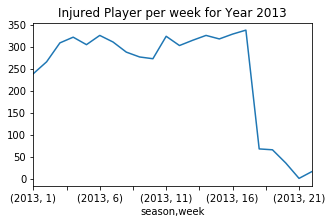

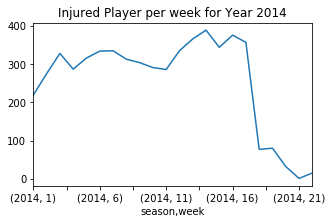

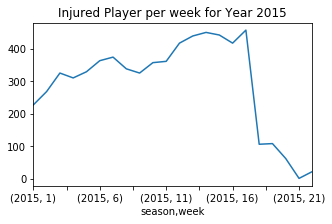

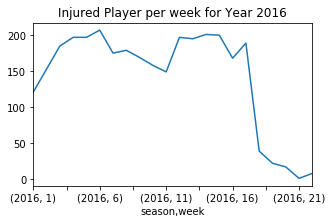

In [154]:
%pylab inline
pylab.rcParams['figure.figsize'] = (5,3)

#fig, axs = plt.subplots(1,2)
#plt.subplot(2,1,1)

inj_year2013_week[['Player']].plot(legend=False)
plt.title('Injured Player per week for Year 2013')
#plt.subplot(2,1,2)

inj_year2014_week[['Player']].plot(legend=False)
plt.title('Injured Player per week for Year 2014')

#plt.subplot(2,2,1)

inj_year2015_week[['Player']].plot(legend=False)
plt.title('Injured Player per week for Year 2015')

#plt.subplot(2,2,2)

inj_year2016_week[['Player']].plot(legend=False)
plt.title('Injured Player per week for Year 2016')

plt.show()

In [155]:
inj_plyr_year = df_injury_Original.groupby(['season','Injury'],as_index=False)['Player'].count()
inj_plyr_year_2013 = df_injury_Original[df_injury_Original.season==2013].groupby(['Injury'],as_index=False)['Player'].count().sort_values(['Player'],ascending = [0]).head(10)
inj_plyr_year_2014 = df_injury_Original[df_injury_Original.season==2014].groupby(['Injury'],as_index=False)['Player'].count().sort_values(['Player'],ascending = [0]).head(10)
inj_plyr_year_2015 = df_injury_Original[df_injury_Original.season==2015].groupby(['Injury'],as_index=False)['Player'].count().sort_values(['Player'],ascending = [0]).head(10)
inj_plyr_year_2016 = df_injury_Original[df_injury_Original.season==2016].groupby(['Injury'],as_index=False)['Player'].count().sort_values(['Player'],ascending = [0]).head(10)


df_injury_Original.groupby(['season','Injury'],as_index=False)['Player'].count().sort_values(['season','Player'],ascending = [1,0]).head(10)

,season,Injury,Player
115,2013,knee,951
8,2013,ankle,587
84,2013,hamstring,457
182,2013,shoulder,386
61,2013,foot,284
76,2013,groin,277
40,2013,concussion,219
202,2013,toe,141
18,2013,back,139
99,2013,hip,136


In [156]:
ply_pos= df_injury_Original.groupby(['PlayerPosition'],as_index=False)['Player'].count().sort_values(['Player'],ascending=[0]).head(10)
df_injury_Original.groupby(['PlayerPosition'])['Player'].count().sort_values(ascending = False).head(10)

PlayerPosition
LB    3201
WR    2650
CB    2379
RB    2099
S     1694
TE    1590
DE    1500
T     1346
DT    1182
G     1145
Name: Player, dtype: int64

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt

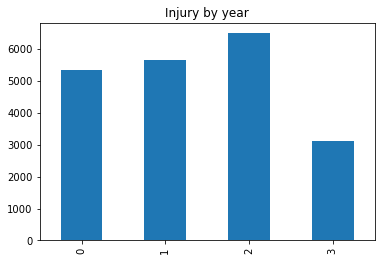

In [159]:
inj_year['Player'].plot.bar()
plt.title('Injury by year')

# Use plt.tight_layout() to improve the spacing between subplots
#plt.tight_layout()
plt.show()

Populating the interactive namespace from numpy and matplotlib


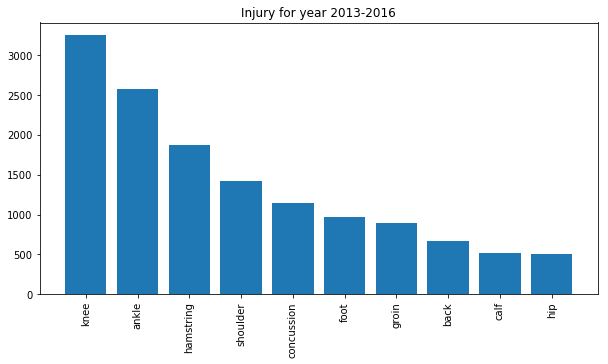

In [162]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,5)

i =range(10)
plt.bar(i,inj_plyr['Player'])
plt.title('Injury for year 2013-2016')
plt.xticks(i,inj_plyr['Injury'],rotation = 'vertical')
plt.show()

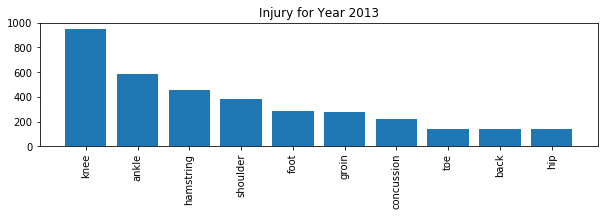

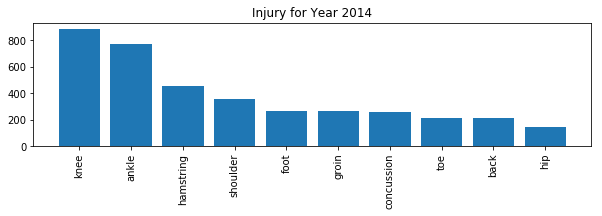

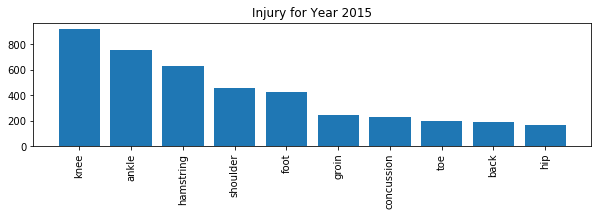

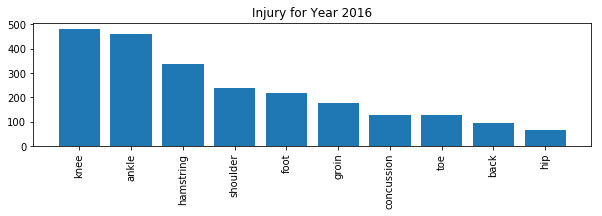

In [163]:

plt.subplot(2,1,1)
i =range(10)
plt.bar(i,inj_plyr_year_2013['Player'])
plt.title('Injury for Year 2013')
plt.xticks(i,inj_plyr_year_2013['Injury'],rotation = 'vertical')
plt.show()

plt.subplot(2,1,2)
i =range(10)
plt.bar(i,inj_plyr_year_2014['Player'])
plt.title('Injury for Year 2014')
plt.xticks(i,inj_plyr_year_2013['Injury'],rotation = 'vertical')
plt.show()


plt.subplot(2,1,2)
i =range(10)
plt.bar(i,inj_plyr_year_2015['Player'])
plt.title('Injury for Year 2015')
plt.xticks(i,inj_plyr_year_2013['Injury'],rotation = 'vertical')
plt.show()

plt.subplot(2,1,2)
i =range(10)
plt.bar(i,inj_plyr_year_2016['Player'])
plt.title('Injury for Year 2016')
plt.xticks(i,inj_plyr_year_2013['Injury'],rotation = 'vertical')
plt.show()

Populating the interactive namespace from numpy and matplotlib


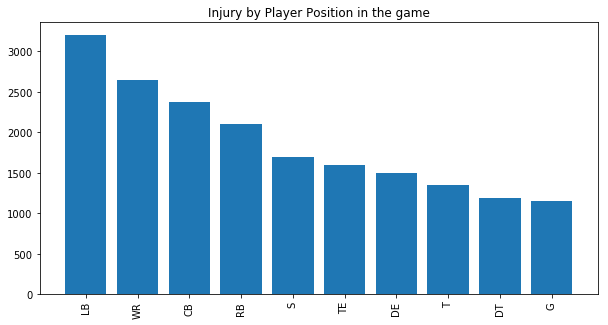

In [164]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,5)

i =range(10)
plt.bar(i,ply_pos['Player'])
plt.xticks(i,ply_pos['PlayerPosition'],rotation = 'vertical')
plt.title('Injury by Player Position in the game')
plt.show()

In [165]:
topQB = F_mean_sorted[F_mean_sorted.Rank > 0  ]
topQB[['Name','Passer Rating_Mean','PrevRating']].sort_values(['Passer Rating_Mean'],ascending=[0]).head(5)

,Name,Passer Rating_Mean,PrevRating
12,"Brees, Drew",100.795833,100.100000
275,"Rodgers, Aaron",100.241538,0.000000
65,"Foles, Nick",96.238889,69.885714
308,"Smith, Alex",95.750000,91.300000
307,"Smith, Alex",91.300000,90.103125


In [166]:
Top10QB = topQB[['Name','Passer Rating_Mean']].groupby('Name',as_index=False).mean().sort_values(['Passer Rating_Mean'],ascending=[0]).head(10)
Top10QB

,Name,Passer Rating_Mean
1,"Brees, Drew",100.795833
46,"Smith, Alex",93.525000
2,"Bridgewater, Teddy",80.846667
36,"Newton, Cam",80.575171
45,"Siemian, Trevor",71.984375
10,"Fitzpatrick, Ryan",59.000000
17,"Hoyer, Brian",50.345139
9,"Fales, David",44.325000
22,"Kessler, Cody",43.975000
50,"Taylor, Tyrod",42.917857


Populating the interactive namespace from numpy and matplotlib


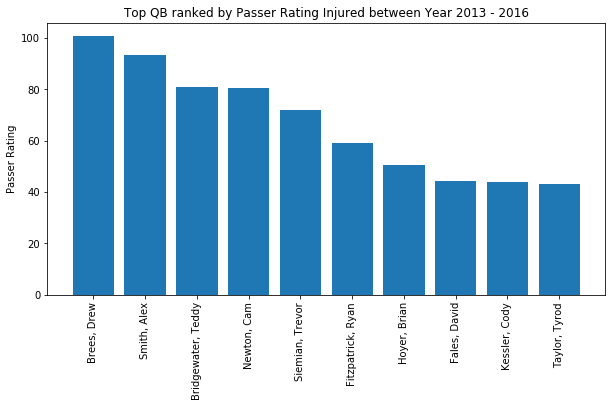

In [167]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,5)

i =range(10)
plt.bar(i,Top10QB['Passer Rating_Mean'])
plt.xticks(i,Top10QB['Name'],rotation = 'vertical')
plt.title('Top QB ranked by Passer Rating Injured between Year 2013 - 2016')
plt.ylabel('Passer Rating')
plt.show()

In [168]:
inj_year.reset_index('season')
inj_year.head()

TypeError: 'in <string>' requires string as left operand, not int

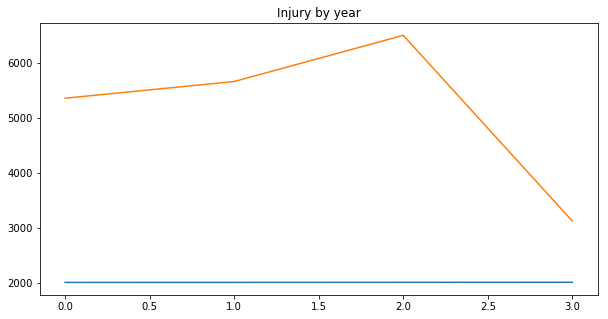

In [169]:
plt.plot(inj_year)
plt.title('Injury by year')
plt.show()

In [166]:
F_mean_sorted.head()
x=F_mean_sorted[['Passer Rating_Mean','PrevRating']]
x.reset_index(drop = True, inplace = True)

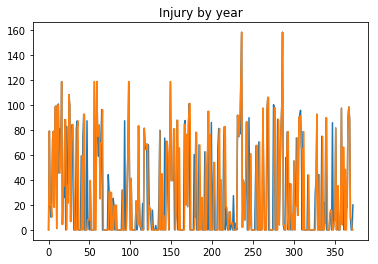

In [169]:
plt.plot(x['Passer Rating_Mean'])
plt.plot(x['PrevRating'])
plt.title('Injury by year')
plt.show()

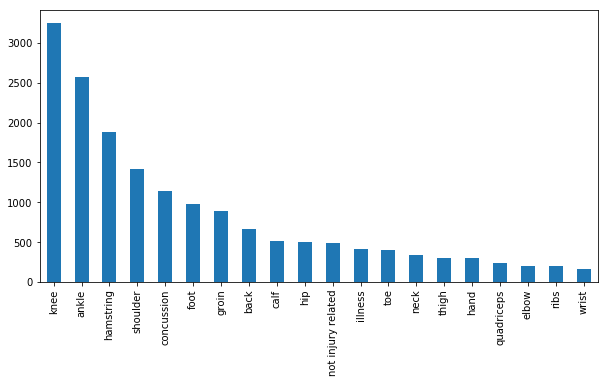

In [172]:
i = range(20)
inj_plyr_20.Player.plot.bar()
plt.xticks(i,inj_plyr_20['Injury'],rotation = 'vertical')
plt.show()

In [173]:
QB_improve =F_mean_sorted[(F_mean_sorted.PrevRating > 0)&(F_mean_sorted.Rank > 0)& (F_mean_sorted['Passer Rating_Mean']>F_mean_sorted['PrevRating']) ].groupby(['Name'],as_index=False).mean().sort_values(['Passer Rating_Mean'],ascending=[0]).head(10)
QB_improve

,Name,Rank,Passer Rating_Mean,PrevRating,PrevRank
1,"Brees, Drew",1.0,100.795833,100.100000,0.0
4,"Foles, Nick",1.0,96.238889,69.885714,0.0
11,"Smith, Alex",1.5,93.525000,90.701562,0.5
8,"Newton, Cam",2.0,90.232143,74.669231,1.0
6,"Luck, Andrew",10.0,87.616667,84.672727,9.0
3,"Cutler, Jay",6.0,87.318750,81.459091,5.0
7,"McCown, Josh",6.0,81.214286,66.580000,5.0
2,"Bridgewater, Teddy",1.0,80.846667,45.550000,0.0
10,"Siemian, Trevor",1.0,73.600000,19.159091,0.0
5,"Hoyer, Brian",2.0,68.775000,64.450000,1.0


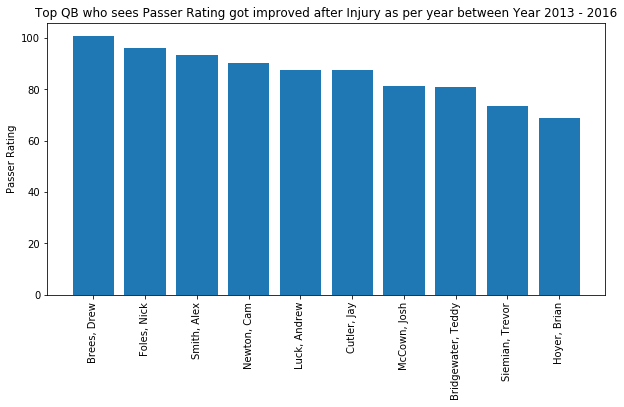

In [174]:
i =range(10)
plt.bar(i,QB_improve['Passer Rating_Mean'])
plt.xticks(i,QB_improve['Name'],rotation = 'vertical')
plt.title('Top QB who sees Passer Rating got improved after Injury as per year between Year 2013 - 2016')
plt.ylabel('Passer Rating')
plt.show()

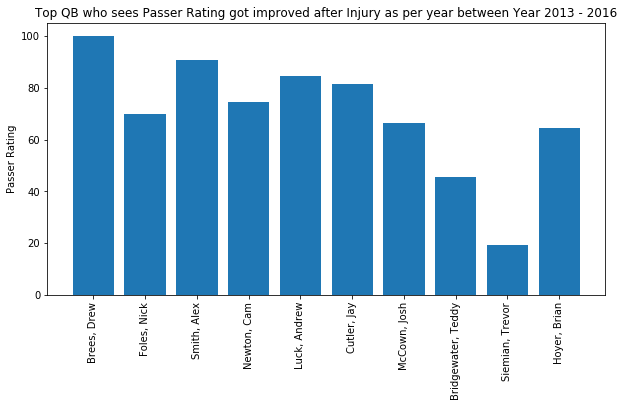

In [175]:
i =range(10)
plt.bar(i,QB_improve['PrevRating'])
plt.xticks(i,QB_improve['Name'],rotation = 'vertical')
plt.title('Top QB who sees Passer Rating got improved after Injury as per year between Year 2013 - 2016')
plt.ylabel('Passer Rating')
plt.show()

In [176]:
QB_not_improve =F_mean_sorted[(F_mean_sorted.PrevRating > 0)&(F_mean_sorted.Rank > 0)& (F_mean_sorted['Passer Rating_Mean']<F_mean_sorted['PrevRating']) ].groupby(['Name'],as_index=False).mean().sort_values(['Passer Rating_Mean'],ascending=[0]).head(10)
QB_not_improve

,Name,Rank,Passer Rating_Mean,PrevRating,PrevRank
28,"Newton, Cam",2.0,75.746684,90.998424,1.0
35,"Siemian, Trevor",2.0,70.368750,73.600000,1.0
6,"Fitzpatrick, Ryan",1.0,59.000000,75.292727,0.0
15,"Kessler, Cody",1.5,43.975000,66.601786,0.5
32,"Roethlisberger, Ben",3.0,43.918966,93.197222,2.0
12,"Hoyer, Brian",2.0,32.225000,68.605000,1.0
33,"Savage, Tom",2.5,27.383333,30.958654,1.5
1,"Campbell, Jason",1.0,25.904545,34.954545,0.0
0,"Anderson, Derek",1.0,10.216129,20.178571,0.0
3,"Cutler, Jay",5.5,8.725000,66.452009,4.5


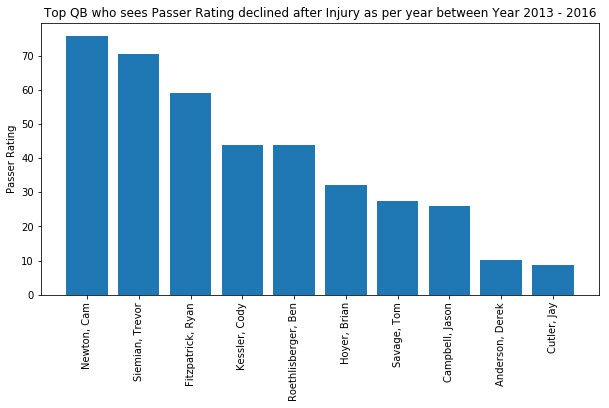

In [177]:
i =range(10)
plt.bar(i,QB_not_improve['Passer Rating_Mean'])
plt.xticks(i,QB_not_improve['Name'],rotation = 'vertical')
plt.title('Top QB who sees Passer Rating declined after Injury as per year between Year 2013 - 2016')
plt.ylabel('Passer Rating')
plt.show()

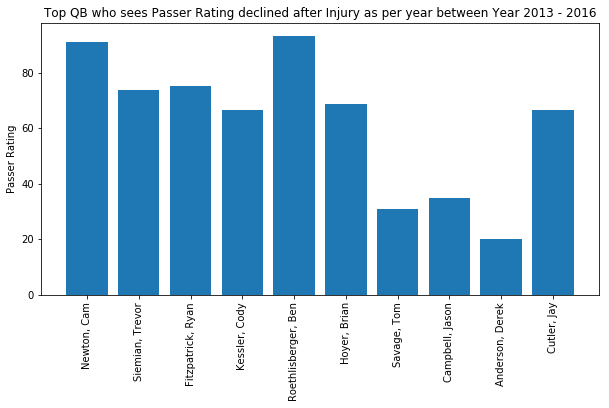

In [178]:
i =range(10)
plt.bar(i,QB_not_improve['PrevRating'])

plt.xticks(i,QB_not_improve['Name'],rotation = 'vertical')
plt.title('Top QB who sees Passer Rating declined after Injury as per year between Year 2013 - 2016')
plt.ylabel('Passer Rating')
plt.show()